# Project: Investigating No-Show Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set represents appointments that patients did or did not show up for in Brazil. This categorizes patients by multiple conditions, ages, gender and even if they receive aid. 
>
> For this data set, there will be three questions addressed. First, it will address whether or not alcoholism leads to more missed appointments. Second, it will determine if any age groups miss more appointments than others. Finally, it will look at differences in gender. 

> This section includes: loading the packages needed for the analysis. 

In [1]:
#import the packages and assign an alias:

import unicodecsv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Show graphs inline
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> This section of the report will load the data, check for cleanliness, trim and clean the dataset. 


In [2]:
#Open and Read the file. 

noshow_filename = '/Users/knico/OneDrive/Documents/Python Scripts/noshowappointments-kagglev2-may-2016.csv'
    
def open_files(my_name):
    with open(my_name , 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#use the open_files function to opent the file.    

no_show_appointments = open_files(noshow_filename)

# Print a line of the no show appointment file.

print('No Show Appointments:', no_show_appointments[0:5])


No Show Appointments: [{'PatientId': '2.98725E+13', 'AppointmentID': '5642903', 'Gender': 'F', 'ScheduledDay': '2016-04-29T18:38:08Z', 'AppointmentDay': '2016-04-29T00:00:00Z', 'Age': '62', 'Neighbourhood': 'JARDIM DA PENHA', 'Scholarship': '0', 'Hipertension': '1', 'Diabetes': '0', 'Alcoholism': '0', 'Handcap': '0', 'SMS_received': '0', 'No-show': 'No'}, {'PatientId': '5.58998E+14', 'AppointmentID': '5642503', 'Gender': 'M', 'ScheduledDay': '2016-04-29T16:08:27Z', 'AppointmentDay': '2016-04-29T00:00:00Z', 'Age': '56', 'Neighbourhood': 'JARDIM DA PENHA', 'Scholarship': '0', 'Hipertension': '0', 'Diabetes': '0', 'Alcoholism': '0', 'Handcap': '0', 'SMS_received': '0', 'No-show': 'No'}, {'PatientId': '4.26296E+12', 'AppointmentID': '5642549', 'Gender': 'F', 'ScheduledDay': '2016-04-29T16:19:04Z', 'AppointmentDay': '2016-04-29T00:00:00Z', 'Age': '62', 'Neighbourhood': 'MATA DA PRAIA', 'Scholarship': '0', 'Hipertension': '0', 'Diabetes': '0', 'Alcoholism': '0', 'Handcap': '0', 'SMS_received

In [3]:
# Create a pandas dataframe and view the first 3 lines.
#have Pandas return the first 3 rows.
df_noshow = pd.read_csv(noshow_filename)
print(df_noshow.head(3))

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62    MATA DA PRAIA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  


### Data Cleaning

> 1) Review then Update the Data Types <br>
> 2) Find and clean bad data.<br>

<ul>
<li><a href="#DataTypes">Data Types</a></li>
<li><a href="#BadData">Find and Clean Bad Data</a></li>
</ul>



<a id='DataTypes'></a>
#### Data Types
>This section the data types are reviewed to see how they converted. <br>
>There are some fields that will be used that are objects or numbers (int, float) and need to be converted to strings. <br>
>When looking at the first few lines of data, the appointment ID and the Patient ID are changing to scientific formats. These items will not be used for any math. They will be converted to strings so they look neater. 

In [4]:
# Display the data types and columns
df_noshow.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# This function will convert the data types
def change_var_type(col_as_string, ctype):
    if ctype == 'string':
        new_type = df_noshow[col_as_string].astype("|S")
    if ctype == 'number':
        new_type = df_noshow[col_as_string].astype(int)
    return new_type
        

In [6]:
# This will convert the first few object, integer and float variables to string.

df_noshow["PatientId"] = change_var_type("PatientId",'string')
df_noshow["AppointmentID"] = change_var_type("AppointmentID",'string')
df_noshow["Gender"] = change_var_type("Gender",'string')


In [7]:
# The neighborhood is more difficult to convert. First, the non-ascii characters need to be removed.
#Once removed, then the type can be changed.
df_noshow.Neighbourhood.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df_noshow["Neighbourhood"] = change_var_type("Neighbourhood",'string')


In [8]:
#A new column will be generated on Noshow as an integer so that is can be used for correlations later.

df_noshow["Noshow2"] = df_noshow["No-show"].map({'Yes': '1', 'No': '0'})
df_noshow["Noshow2"] = pd.to_numeric(df_noshow["Noshow2"])
print(df_noshow.loc[1])
print(df_noshow.head())

PatientId         b'558998000000000.0'
AppointmentID               b'5642503'
Gender                            b'M'
ScheduledDay      2016-04-29T16:08:27Z
AppointmentDay    2016-04-29T00:00:00Z
Age                                 56
Neighbourhood       b'JARDIM DA PENHA'
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Noshow2                              0
Name: 1, dtype: object
              PatientId AppointmentID Gender          ScheduledDay  \
0   b'29872500000000.0'    b'5642903'   b'F'  2016-04-29T18:38:08Z   
1  b'558998000000000.0'    b'5642503'   b'M'  2016-04-29T16:08:27Z   
2    b'4262960000000.0'    b'5642549'   b'F'  2016-04-29T16:19:04Z   
3     b'867951000000.0'    b'5642828'   b'F'  2016-04-29T17:29:31Z   
4    b'8841190000000.0'    b'5642494'   b'

In [9]:
#The name No-show is causing issues because of the dash. This will rename the column in the existing dataframe.
#Then object type can be change to string, and clean up can be done.
#Once complete, we will run info to verify it is complete. 
df_noshow.rename(columns = {'No-show' : 'Noshow' , 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace = True )
df_noshow["Noshow"] = change_var_type("Noshow", 'string')
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  |S32  
 1   AppointmentID   110527 non-null  |S21  
 2   Gender          110527 non-null  |S1   
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  |S26  
 7   Scholarship     110527 non-null  int64 
 8   Hypertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handicap        110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  Noshow          110527 non-null  |S3   
 14  Noshow2         110527 non-null  int64 
dtypes: bytes168(1), bytes208(1), bytes24(1), bytes256(1), bytes8(1), int64(8), object(2)
memory usage: 17.2+ MB


<a id='BadData'></a>
### Find and Clean Bad Data
> This section will review the data to find and clean up data that is not valid. <br>
> First, a review of some statistics will help to find the issue.

In [10]:
# Review some statistics on the data frame.

df_noshow.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow2
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


> There are no null values to be concerned with, but the minimum age is listed as a -1. <br>
> Because the data set is large, it makes more sense to delete it than to put in an average value, or guess the typo.<br>
> Then display the minimum age again to make sure they are all 0 or over.<br>

In [11]:
#Loop through the values and make sure that any values less than 0 will be deleted. This will alter the original data frame.

for x in df_noshow.index:
    if df_noshow.loc[x, "Age"] < 0:
        df_noshow.drop(x, inplace=True)
print("Minimum Age: " , df_noshow["Age"].min())


Minimum Age:  0


<a id='eda'></a>
## Exploratory Data Analysis

> This section will explore the data set and look for insights in the data. Because this has not been tested with a scientific experiment, this section cannot state causation between variables. It will explore three questions and show the correlations and more ideas to explore. 


#### Correlation and the Variables
>First, let's explore correlation between different variables. The independent variable is if the patient showed up for their  appointment or not. The dependent variables include alcoholism, gender, various diseases and conditions, and age. <br>
>The correlation function can be used to get a quick look at all the numberical variables. 

>From the Statology website listed below, this explains the strength of the relationships in the tables and heat maps in the next two sections.
> If we take the absolute value less than .25 is considered to have no relationship.<br>
> A weak relationship would be less than .5, but greater than .25 <br>
> A moderate relationship should be between .5 and .75 <br>
> A strong relationship will be over .75 <br>
https://www.statology.org/what-is-a-strong-correlation/

> For the correlation function, a 1 is a perfect relationship, and it will be a one when compared with itself.

In [13]:
# Show the correlation between variables. 
df_noshow.corr()


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow2
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
Noshow2,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


### Research Question 1: Alcoholism
#### Are Alcoholics More Likely to Miss Their Appointments?  

>Per the Valley Hope website listed below, two symptoms of being an alcoholic are "Drinking at inappropriate times or alone."
> and "Drinking with the intention of getting drunk."<br>
>Because someone that suffers from alcoholism may be drinking at inappropriate times, and could be at a level of intoxication, it could be unsafe for them to drive to appointments. They may also feel ashamed, or be worried about being judged by the Dr. This will use a heat map to quickly consume the data listed in the table above.

https://valleyhope.org/am-i-an-alcoholic/?gclid=Cj0KCQjwtMCKBhDAARIsAG-2Eu-fbNnCXP2UDs3qlLtZmKwl6isq0sZilas442qdDCb1pMOofD1rTQQaAklFEALw_wcB

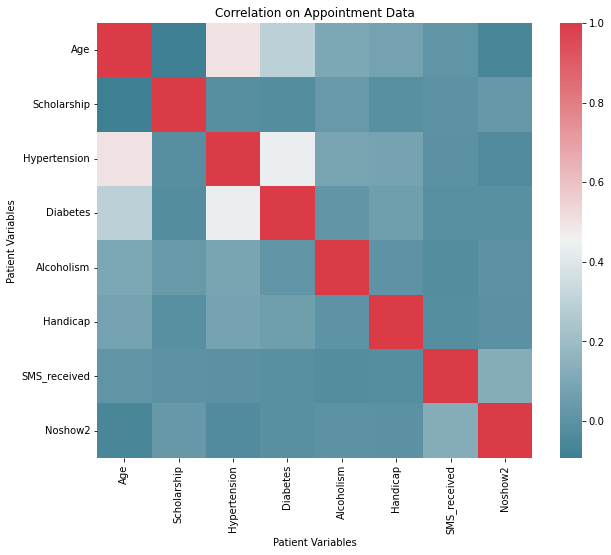

In [14]:
#Research question 1- Heat map to show correlation between alcoholism.
f, ax = plt.subplots(figsize= (10,8))
corr = df_noshow.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype= bool) , cmap= sns.diverging_palette(220, 10, as_cmap = True), square = True, ax= ax)
plt.title("Correlation on Appointment Data")
plt.ylabel("Patient Variables")
plt.xlabel("Patient Variables")
plt.show()



>Surprisingly, there is no relationship between not showing up for appointments and suffering from alcoholism. 
>There does seem to be a weak to modeate relationship between hypertension and diabetes, and a moderate relationship between age and hypertension. These could be investigated at another time. 

### Research Question 2: Age
#### What age ranges are most likely to miss appointments? 

>Those very young or very old would have to rely on others for rides. There are other differences between age groups as well, so let's explore the data to see which age groups tend to miss the most appointments. 

In [15]:
# Make a new dataframe consisting of only the no show appointments.
i = 0
df_noshow_appointments = pd.DataFrame()
appointment_list = [1]
df_noshow_appointments = df_noshow[df_noshow.Noshow2.isin(appointment_list)]

print("Total Missed Appointments: ", len(df_noshow_appointments))

Total Missed Appointments:  22319


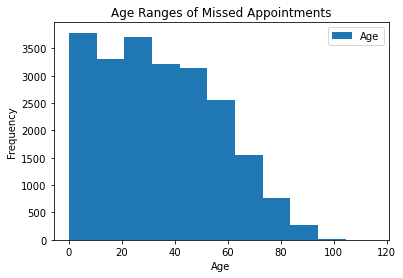

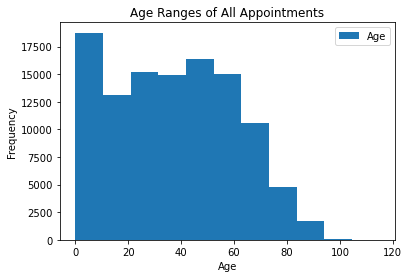

In [16]:
#Histogram to show only missed appointments.
df_noshow_appointments.plot(kind='hist', y = 'Age', x='Noshow', bins = 11)
plt.title('Age Ranges of Missed Appointments')
plt.xlabel("Age")
plt.show()


#Histogram to show ages of all appointments mage

df_noshow.plot(kind='hist', y = 'Age', x ='Noshow', bins = 11)
plt.title('Age Ranges of All Appointments')
plt.xlabel("Age")
plt.show()


>The first histogram shows that there are higher frequencies of missed appointments for all age buckets for patients 0-10 and 20-30. When looking at the entire dataset by age, it shows that children ages 0-10 have a higher number of appointments overall, so it makes sense that they would miss more. However, the 20-30 group, while on the larger size, seems to have a large amount of missed appointments in comparison with total appointments. This should be explored further, but the doctor's staff could set up an experiment to see if additional SMS message warnings would help to have less no shows. 

### Research Question 3: Gender
#### Does one gender miss more appointments than the other?

> Finally, this will explore whether or not one gender is canceling more appointments than the other. This will use a bar chart to count the missed appointments by gender. 

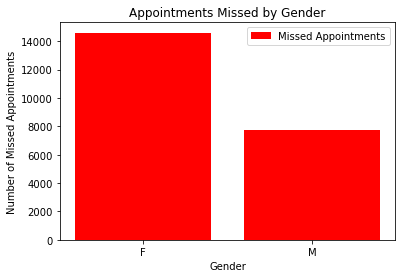

Total Appointments for Females:  71839
Total Appointments for Males:  38687
Ratio for Missed Appointment Females:  0.20314870752655242
Ratio for Missed Appointment Males:  0.19967947889471915


In [17]:
#Female vs. Male appointments
Genderindexes_NoShow = df_noshow_appointments['Gender'].value_counts().index.tolist()
Gendercount_NoShow = df_noshow_appointments['Gender'].value_counts().values.tolist()


plt.bar(Genderindexes_NoShow, Gendercount_NoShow, color='r', label='Missed Appointments')
plt.title("Appointments Missed by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Missed Appointments")
plt.legend()
plt.show()

Genderindexes_All = df_noshow['Gender'].value_counts().index.tolist()
Gendercount_All = df_noshow['Gender'].value_counts().values.tolist()
print('Total Appointments for Females: ' , Gendercount_All[0])
print('Total Appointments for Males: ' , Gendercount_All[1])

def ratio_Missed(indexnum):
    my_ratio = Gendercount_NoShow[indexnum] / Gendercount_All[indexnum]
    return my_ratio

print("Ratio for Missed Appointment Females: " , ratio_Missed(0))
print("Ratio for Missed Appointment Males: " , ratio_Missed(1))
    

>Although females appear to miss a lot more appointments than men, when comparing the amount of missed appointments to total appointments, they are both missing about one in five appointments, with men just a small amount less.

<a id='conclusions'></a>
## Conclusions

>    This dataset was imported into a pandas dataset and then cleaned. The cleansing involved removing bad data in the form of a negative age, a symbol in a column, and non-ascii characters. It also involved changing the data types and formatting the no show column to be able to demonstrate correlations. <br>
>    The data was explored for correlations, and no strong correlations were found between the variables and missing an appointment. People with alcoholism do not miss a significant amount of appointments less or more than people without that condition. Gender seems to have no correlation with missed appointments, though in this dataset, more females book appointments than males. In addition, while age did not have a correlation to missed appointments, the doctors' office may want to experiment on ways to target the 20-30 age range, since they missed a larger percentage of their appointments. Causation cannot be determined at this time. 
>
### Limitations
>Some of the limitations included were that the younger ages and oldest ages could not bring themselves to the appointment. Another analysis could be done eliminating those ranges, or also considering the information on the person responsible for bringing them. 

### Sites and Materials Referenced:

>W3 Schools <br>
>"Python All-In-One for Dummies" <br>
https://www.kite.com/python/answers/how-to-convert-a-column-of-objects-to-strings-in-a-pandas-dataframe-in-python
https://datatofish.com/string-to-integer-dataframe/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.#
https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
https://www.youtube.com/watch?v=71FoexyFCXE
https://www.askpython.com/python/examples/subset-a-dataframe
https://newbedev.com/remove-non-ascii-characters-from-pandas-column
https://www.statology.org/what-is-a-strong-correlation/
https://www.python-graph-gallery.com/4-add-title-and-axis-label
https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
https://valleyhope.org/am-i-an-alcoholic/?gclid=Cj0KCQjwtMCKBhDAARIsAG-2Eu-fbNnCXP2UDs3qlLtZmKwl6isq0sZilas442qdDCb1pMOofD1rTQQaAklFEALw_wcB


###### Kristin Lynch 9/26/21